0.000000
3.020625
3.325500
8.435062
8.598687
8.737625
8.941063
10.057563
10.342875
10.520000
10.773313
10.970437
11.176250
14.617625
14.724000
14.943500
15.152562
15.345500
15.528500
17.356375
17.620062
17.805563
17.999813
18.194937
20.388063
20.710812
23.133125
32.216686
41.902248
45.972626
47.921501
48.091686
48.483437
55.981125
61.460812
61.652313
65.040375
65.328751
65.654251
65.886124
66.100998
79.761063
80.943748
81.226814
81.369247
81.562561
81.780502
81.994934
82.228561
86.352997
86.637375
86.756561
86.976875
87.194313
87.437691
88.594124
88.913376
89.229813
89.411247
89.611374
89.826309
91.499496
91.786934
91.913559
92.130997
92.340813
92.558937
92.786064
96.782562
97.104874
97.411560
97.620560
97.806999
101.473938
101.778816
102.089935
102.289062
102.486504
103.568939
103.977997
104.278252
104.563377
104.771751
104.985313
105.213623
106.458374
116.939125
117.240875
117.569191
117.758438
117.964996
127.314064
131.374557
131.695496
132.022568
132.214691
132.418503
134.303497
13

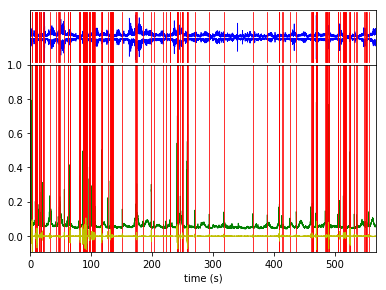

In [5]:
import sys
from aubio import onset, source
from numpy import hstack, zeros
import matplotlib.pyplot as plt

%matplotlib inline

win_s = 1024                 # fft size
hop_s = win_s // 2          # hop size

filename = '/home/tracek/Data/Birdman/raw/STHELENA-02_20140605_200000_1_16k.wav'

samplerate = 0

s = source(filename, samplerate, hop_s)
samplerate = s.samplerate
o = onset("default", win_s, hop_s, samplerate)

# list of onsets, in samples
onsets = []

# storage for plotted data
desc = []
tdesc = []
allsamples_max = zeros(0,)
downsample = 2  # to plot n samples / hop_s

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    if o(samples):
        print("%f" % (o.get_last_s()))
        onsets.append(o.get_last())
    # keep some data to plot it later
    new_maxes = (abs(samples.reshape(hop_s//downsample, downsample))).max(axis=0)
    allsamples_max = hstack([allsamples_max, new_maxes])
    desc.append(o.get_descriptor())
    tdesc.append(o.get_thresholded_descriptor())
    total_frames += read
    if read < hop_s: break

if 1:
    # do plotting
    allsamples_max = (allsamples_max > 0) * allsamples_max
    allsamples_max_times = [ float(t) * hop_s / downsample / samplerate for t in range(len(allsamples_max)) ]
    plt1 = plt.axes([0.1, 0.75, 0.8, 0.19])
    plt2 = plt.axes([0.1, 0.1, 0.8, 0.65], sharex = plt1)
    plt.rc('lines',linewidth='.8')
    plt1.plot(allsamples_max_times,  allsamples_max, '-b')
    plt1.plot(allsamples_max_times, -allsamples_max, '-b')
    for stamp in onsets:
        stamp /= float(samplerate)
        plt1.plot([stamp, stamp], [-1., 1.], '-r')
    plt1.axis(xmin = 0., xmax = max(allsamples_max_times) )
    plt1.xaxis.set_visible(False)
    plt1.yaxis.set_visible(False)
    desc_times = [ float(t) * hop_s / samplerate for t in range(len(desc)) ]
    desc_max = max(desc) if max(desc) != 0 else 1.
    desc_plot = [d / desc_max for d in desc]
    plt2.plot(desc_times, desc_plot, '-g')
    tdesc_plot = [d / desc_max for d in tdesc]
    for stamp in onsets:
        stamp /= float(samplerate)
        plt2.plot([stamp, stamp], [min(tdesc_plot), max(desc_plot)], '-r')
    plt2.plot(desc_times, tdesc_plot, '-y')
    plt2.axis(ymin = min(tdesc_plot), ymax = max(desc_plot))
    plt.xlabel('time (s)')
    #plt.savefig('/tmp/t.png', dpi=200)
    plt.show()

In [6]:
len(onsets)

209